# Сборный проект "Исследование рынка игр"
*Выполнен Маргаритой Мельниковой в марте 2021г. в рамках обучения на курсе по анализу данных от Яндекс.Практикума и Университета 2035*

<font size="5"><b>Содержание</b></font>
<font size="4">
1. [Введение](#Sec01) <br>
2. [Загрузка, первичный анализ и подготовка данных](#Sec02) <br>
    2.1. [Загрузка данных и знакомство с ними](#Sec02-01) <br>
    2.2. [Подготовка данных к анализу](#Sec02-02) <br>
3. [Исследовательский анализ данных](#Sec03) <br>
    3.1. [Рынок игр с 1980 по 2016 гг.](#Sec03-01) <br>
    3.2. [Платформы - эволюция, тренды](#Sec03-02) <br>
    3.3. [Пристальный взгляд на платформы](#Sec03-03) <br>
    3.4. [Пристальный взгляд на жанры](#Sec03-04) <br>
4. [Портрет пользователя каждого региона](#Sec04) <br>
5. [Жанры и рейтинги](#Sec05) <br>
    5.1. [Жанры глазами пользователей](#Sec05-01) <br>
    5.2. [Жанры глазами критиков](#Sec05-02) <br>
6. [Проверка гипотез](#Sec06) <br>
    6.1. [Средние пользовательские рейтинги платформ Xbox One и PC](#Sec06-01) <br>
    6.2. [Средние пользовательские рейтинги жанров Action и Sports](#Sec06-02) <br>
7. [Вывод](#sec07)
</font>

<a id='Sec01'></a> 
## Введение

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.
Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

**Цель** - выявить определяющие успешность игры закономерности, чтобы:
- сделать ставку на потенциально популярный продукт и 
- спланировать рекламные кампании.

**Данные**: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года, из открытых источников. Данные за 2016 год могут быть неполными. <br>

**Описание данных games.csv**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (от 0 до 100)
- User_Score — оценка пользователей (от 0 до 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

<a id='Sec02'></a>
## Загрузка, первичный анализ и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

<a id=Sec02-01></a>
###  Загрузка данных и знакомство с ними

- Приведем названия столбцов к нижнему регистру

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# %% пропусков
games.isnull().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [8]:
# уникальные значения в качественных колонках, кроме названия игры
extract = games.loc[:, ['platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']].copy()
for col in extract.columns:
    print(col, " - уникальных значений ", len(extract[col].unique()), ": ", extract[col].unique())
del extract

platform  - уникальных значений  31 :  ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
year_of_release  - уникальных значений  38 :  [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
genre  - уникальных значений  13 :  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
critic_score  - уникальных значений  83 :  [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35.

In [9]:
# проверим, где отсутствует название игры и жанр - 2 записи отсутствуют
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# проверим, где отсутсвует название игры и жанр - 2 записи отсутствуют
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Промежуточные выводы:** <br>
1) отсутствуют значения в полях: 
       - 'name' и 'genre' - возможно, чтобы показать корректные продажи в 1993 году;
       - 'rear_of_release' - возможно, вызвано ошибкой парсинга, например, в некоторых разваниях указан год;
       - 'critic_score', 'user_score', 'rating' - возможно, рейтинги стали ставить с определенного года;
2) нужно изменить формат поля 'user_score' на float64, 'rear_of_release' на integer; <br>
3) статистика по играм за 37 лет.

<a id=Sec02-01></a>
### Подготовка данных к анализу

- Преобразуем данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему.

*Выше установили, что нужно изменить формат поля User_Score на float64. Дело в том, что это количественная переменная, с которой по смыслу возможно проводить математические операции, текущий формат этого не позволит сделать. Так как есть дробная часть, то уместно использовать float.*

In [11]:
# посмотрим, какие значения принимает поле User_Score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*'user_score' имеет значение 'tbd', в связи с этим при импорте колонке был присвоен тип object. Необходимо заменить данное значение таким, которое позводит проводить математические операции над пользовательскими рейтингами и сохранит десятичную часть. TBD означает, что еще рейтинга нет, поэтому заменим на np.NaN*

In [12]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.NaN
games['user_score'] = games['user_score'].astype('float')
''

''

*'year_of_release' является дискретной переменной, поэтому переведем в целочисленный тип данных. np.NaN является типом с плавающей запятой, поэтому пропуск заменим на -1*

In [13]:
games['year_of_release'].fillna(-1, inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')
print('')

- Обработаем пропуски при необходимости

-- **name**: похоже, что пропуски в названии игр вызваны финансовыми соображеними, чтобы показать точную сумму продаж в 1993 году. Заменять пропуск нецелесообразно;

-- **year_of_release**: теоретически пропуски можно заменить, обогатив данные, либо заменив одной из средней. Посмотрим на данные внимательнее. 

In [14]:
# так как pivot_table() не показывает NaN, сделаем дубликат таблицы и заменим пропуск
extract = games.copy()
extract.pivot_table(
    index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
    aggfunc='sum',
    margins=True
)

,eu_sales,jp_sales,na_sales,other_sales
year_of_release,,,,
-1,24.46,6.70,59.15,8.61
1980,0.67,0.00,10.59,0.12
1981,1.96,0.00,33.40,0.32
1982,1.65,0.00,26.92,0.31
1983,0.80,8.10,7.76,0.14
1984,2.10,14.27,33.28,0.70
1985,4.74,14.56,33.73,0.92
1986,2.84,19.81,12.50,1.93
1987,1.41,11.63,8.46,0.20


In [15]:
extract.pivot_table(
    index='genre',
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    aggfunc='sum',
    margins=True)

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,519.13,161.43,879.01,184.60
Adventure,63.54,52.30,105.26,16.49
Fighting,100.33,87.48,223.36,36.36
Misc,212.74,108.11,407.27,74.39
Platform,200.35,130.83,445.50,51.09
Puzzle,50.01,57.31,122.87,12.38
Racing,236.51,56.71,359.35,76.10
Role-Playing,188.71,355.41,330.81,59.63
Shooter,317.34,38.76,592.24,104.11


*В целом пропуски составляют небольшую долю в продажах, поэтому можем пренебречь обогащением данных. Возможно, в дальнейшем вернемся к этому вопросу.*

-- **critic_score, user_score**: посмотрим распределение по годам

In [16]:
games.groupby('year_of_release')['critic_score', 'user_score'].apply(lambda x: x.isnull().mean())

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,critic_score,user_score
year_of_release,,
-1,0.427509,0.527881
1980,1.000000,1.000000
1981,1.000000,1.000000
1982,1.000000,1.000000
1983,1.000000,1.000000
1984,1.000000,1.000000
1985,0.928571,0.928571
1986,1.000000,1.000000
1987,1.000000,1.000000


*Пропуски в рейтингах зависят от года выпуска игры. Видимо, их появление вызвано распространением интернета среди пользователей.*

-- **rating**: посмотрим распределение по годам

In [17]:
games.groupby('year_of_release')['rating'].apply(lambda x: x.isnull().mean())

year_of_release
-1       0.327138
 1980    1.000000
 1981    1.000000
 1982    1.000000
 1983    1.000000
 1984    1.000000
 1985    0.928571
 1986    1.000000
 1987    1.000000
 1988    0.933333
 1989    1.000000
 1990    1.000000
 1991    1.000000
 1992    0.953488
 1993    1.000000
 1994    0.991736
 1995    1.000000
 1996    0.973384
 1997    0.934256
 1998    0.915567
 1999    0.875740
 2000    0.577143
 2001    0.296680
 2002    0.209891
 2003    0.209032
 2004    0.215223
 2005    0.248136
 2006    0.326044
 2007    0.314119
 2008    0.312544
 2009    0.291024
 2010    0.363347
 2011    0.381162
 2012    0.456355
 2013    0.419118
 2014    0.406196
 2015    0.480198
 2016    0.442231
Name: rating, dtype: float64

In [18]:
games[
    (games['year_of_release'] <= 1993) & (games['year_of_release'] != -1) & (games['rating'].notna())
]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2612,The 7th Guest,PC,1992,Adventure,0.02,0.77,0.0,0.00,NaN,NaN,T
14470,Alter Ego,PC,1985,Simulation,0.00,0.03,0.0,0.01,59.0,5.8,T
14610,Doom,PC,1992,Shooter,0.02,0.00,0.0,0.00,85.0,8.2,M
14621,SimCity,PC,1988,Simulation,0.00,0.02,0.0,0.01,64.0,2.2,E10+


*ESRB основана в 1994 году, поэтому ранее этого времени рейтинги отсутсвовали. И, видимо, лишь некоторые производители уже потом отправили игру на рейтинг.*

In [19]:
# в дальнейшем нам важно учитывать игры без рейтинга, поэтому заменим np.NaN на 'NoRating'
games['rating'].fillna('NoRating', inplace=True)

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [20]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<a id='Sec03'></a>
## Исследовательский анализ данных
Теперь можем обновить статистику по данным 

In [21]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,16715.000000
mean,1974.177505,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,0.533396
std,252.685735,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,1.548261
min,-1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


<a id='Sec03-01'></a>
### Рынок игр с 1980 по 2016 гг.

''

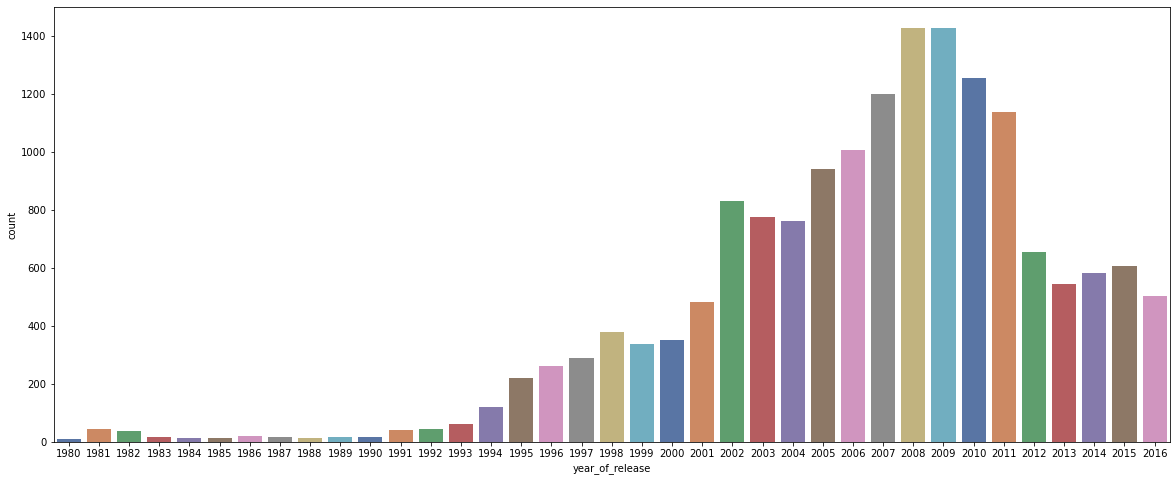

In [22]:
# Количество выпущенных игр
plt.figure(figsize=(20,8))
sns.countplot(
    data=games[games['year_of_release'] != -1], 
    x='year_of_release', 
    palette="deep"
)
''

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


''

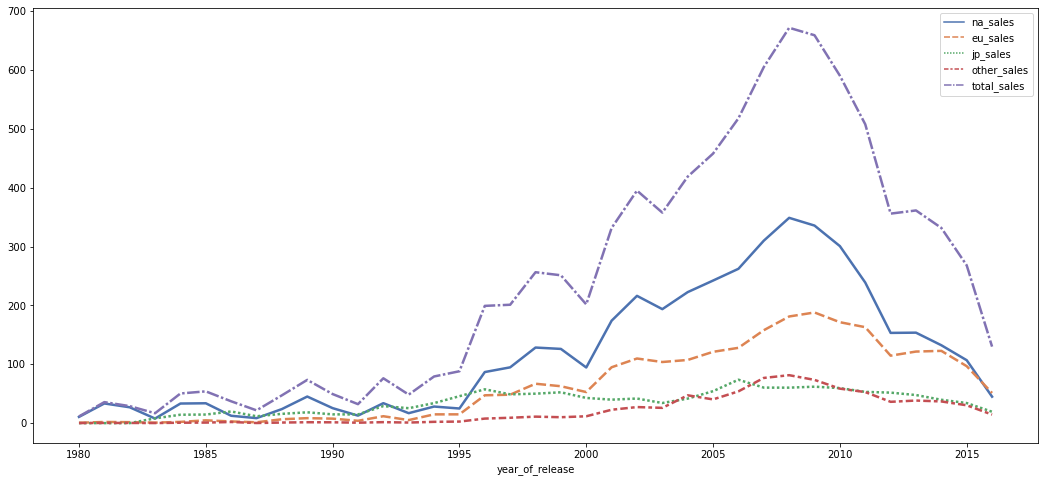

In [23]:
# Продажи
plt.figure(figsize=(18,8))
extract = games[games['year_of_release'] != -1].groupby('year_of_release')[
    'na_sales', 'eu_sales', 'jp_sales', 'other_sales','total_sales'].sum()
sns.lineplot(data=extract, palette="deep", linewidth=2.5)
''

*С 1992 года видно как из в года в год растет количество выпущенных игр. В 2008 году случается финансовый кризис, после которого наблюдается снижение выпуска количества игр. Продажи игр в целом повторяют этот тренд, имея максимум в 2008 году. С течением времени снижается выпуск игр в связи с распространением мобильных платформ.*

<a id='Sec03-02'></a>
### Платформы - эволюция, тренды

In [24]:
top_platforms = games[games['year_of_release'] != -1].groupby(['platform'])['total_sales'].sum().sort_values(
    ascending=False).head(6).index.to_list()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

*Платформы с наибольшими суммарными продажами: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'*. <br>
*Проанализируем тренды по данным платформам*.

''

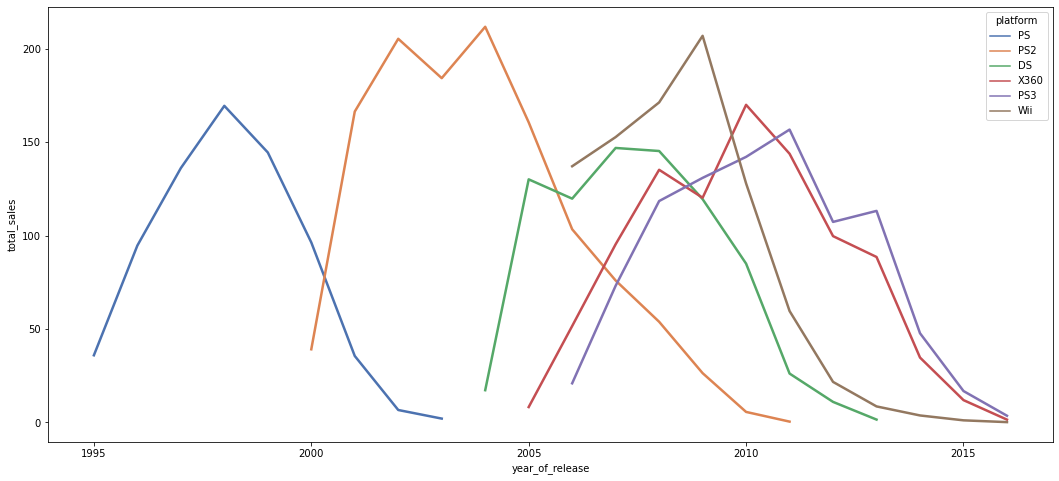

In [25]:
extract = games[(games['year_of_release'] >= 1995) & (games['platform'].isin(top_platforms)) ]
extract = pd.DataFrame(extract.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index())
plt.figure(figsize=(18,8))
sns.lineplot(data=extract, y='total_sales' , x='year_of_release', hue='platform', palette="deep", linewidth=2.5)
''

*Визуально на графике видим, что платформы живут порядка 10 лет. PS, PS2, DS уже забыты.*

Проанализируем срок жизни платформ рассчетным способом.

In [26]:
platforms = games['platform'].unique().tolist()

sales_length = {}
for platform in platforms:
    sales_length[platform] = len(games[(games['platform'] == platform)].groupby('year_of_release')['total_sales'])

sales_length = {k: v for k, v in sorted(sales_length.items(), key=lambda item: item[1])}
sales_length_df = pd.DataFrame(sales_length.items(), columns=['platform', 'years'])
print(sales_length_df['years'].describe()[['mean', '50%']])
print('Максимальный срок службы у', 
      sales_length_df.loc[sales_length_df['years'] == sales_length_df['years'].max(), ['platform']].values[0]
     )

mean    8.193548
50%     8.000000
Name: years, dtype: float64
Максимальный срок службы у ['PC']


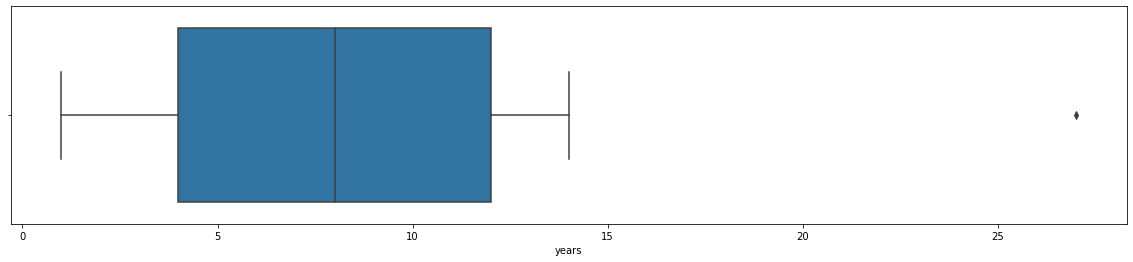

In [27]:
plt.subplots(figsize=(20,4))
sns.boxplot(data=sales_length_df, x='years');
plt.show()

In [28]:
sales_length_top = {}
for platform in top_platforms:
    sales_length_top[platform] = len(games[(games['platform'] == platform)].groupby('year_of_release')['total_sales'])

sales_length_top = {k: v for k, v in sorted(sales_length_top.items(), key=lambda item: item[1])}
sales_length_top_df = pd.DataFrame(sales_length_top.items(), columns=['platform', 'years'])
print(sales_length_top_df['years'].describe()[['mean', '50%']])
print('Максимальный срок службы у', 
      sales_length_top_df.loc[sales_length_top_df['years'] == sales_length_top_df['years'].max(), ['platform']].values[0]
     )

mean    12.166667
50%     12.000000
Name: years, dtype: float64
Максимальный срок службы у ['PS2']


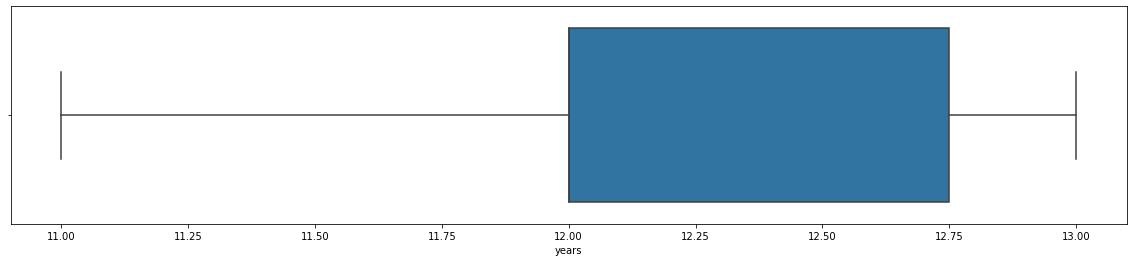

In [29]:
plt.subplots(figsize=(20,4))
sns.boxplot(data=sales_length_top_df, x='years');
plt.show()

Среднее арифметическое и медиана срока жизни всех платформ составляют порядка 8 лет. Выброс 27 лет вызван компьютером, что ожидаемо, в силу универсальности архитектуры персонального компбютера. <br>
Если взять выборку по топ-6 платформ, то их срок жизни составляет порядка 12 лет, что выше чем средней по всему рынку платформ. Что логично в силу того, что топ-6 был определен по совокупной выручке каждой из платформ: чем дольше живет платформа, тем выше кумулятивные продажи.

<a id='Sec03-03'></a>
### Пристальный взгляд на платформы

Выбор актуального периода:
- Мы планируем использовать даный анализ для прогнозирования продаж 2017 года, и так как платформы в среднем живут 8-12 лет, то лучше выбрать год не позднее 2009 г.;
- 2008 - 2009 гг. - время кризиса, поэтому данные ранее этого периода и этого периода будут не совсем релевантны;

Проанализируем продажи игр, выпущенных для тех платформ, у которых в 2016 году выпускались игры

In [30]:
platforms_2016 =  sorted(games.loc[games['year_of_release'] ==2016,'platform'].unique().tolist())
platforms_2016

['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

- PC является нетипичной платформой, поэтому можно убрать из анализа
- на смену PS3 постепенно приходит PS4, а на смену X360 - XOne, а на смену  Wii - Wii.

В связи с этим уберем данные платформы из списка для дальнейшего анализа.

In [31]:
for el in ['PC', 'PS3', 'Wii', 'X360']:
    platforms_2016.remove(el)

In [32]:
for plat in platforms_2016:
    print(plat, " - ", games[games['platform'] == plat].groupby('year_of_release')['total_sales'].sum().round(2).to_dict())

3DS  -  {-1: 1.19, 2011: 63.2, 2012: 51.36, 2013: 56.57, 2014: 43.76, 2015: 27.78, 2016: 15.14}
PS4  -  {2013: 25.99, 2014: 100.0, 2015: 118.9, 2016: 69.25}
PSV  -  {-1: 0.26, 2011: 4.63, 2012: 16.19, 2013: 10.59, 2014: 11.9, 2015: 6.25, 2016: 4.25}
WiiU  -  {2012: 17.56, 2013: 21.65, 2014: 22.03, 2015: 16.35, 2016: 4.6}
XOne  -  {2013: 18.96, 2014: 54.07, 2015: 60.14, 2016: 26.15}


Таким образом, для дальнейшего анализа выберем игры выпущенные в 2011 году и позднее.

- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [33]:
games_extract = games[games['year_of_release'] >= 2011]

''

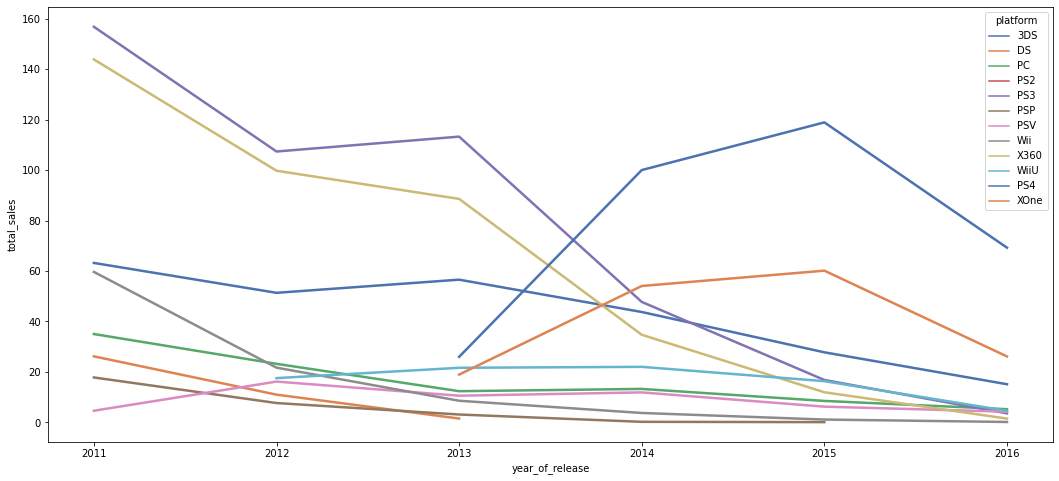

In [34]:
extract = pd.DataFrame(games_extract.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index())
plt.figure(figsize=(18,8))
sns.lineplot(data=extract, y='total_sales' , x='year_of_release', hue='platform', palette="deep", linewidth=2.5)
''

In [35]:
extract[extract['year_of_release'] == 2016].sort_values(by='total_sales', ascending=False)

,year_of_release,platform,total_sales
52,2016,PS4,69.25
57,2016,XOne,26.15
49,2016,3DS,15.14
50,2016,PC,5.25
55,2016,WiiU,4.60
53,2016,PSV,4.25
51,2016,PS3,3.60
56,2016,X360,1.52
54,2016,Wii,0.18


В 2016 г. топ-3 платформ:
- PS4;
- XOne;
- 3DS.

Согласно данным, продажи игр, выпущенных на каждую из этих платформ, снижаются, при этом пока не ожидаем, что их цикл завершится.

- Постройте график «ящик с усами» по глобальным продажам и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

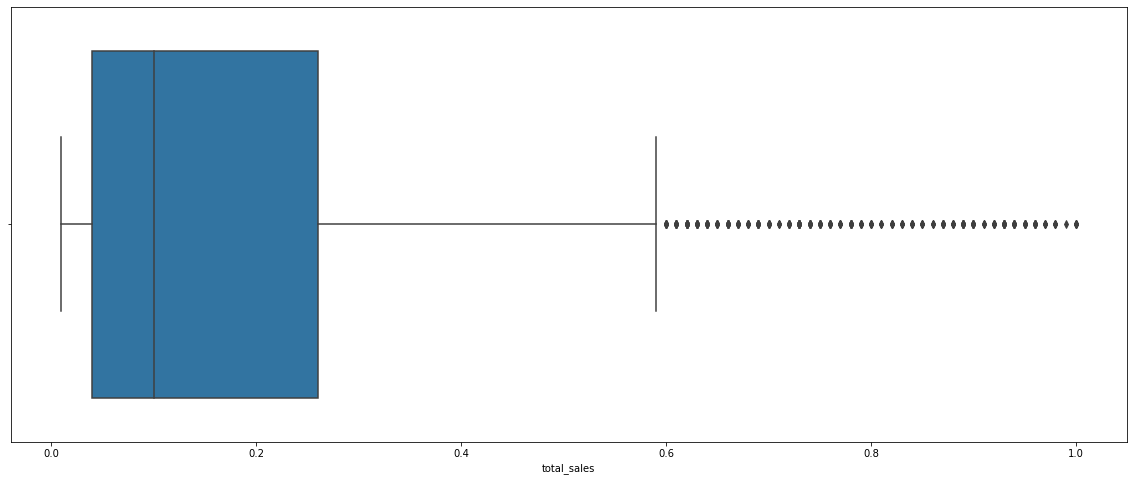

In [36]:
plt.subplots(figsize=(20,8))
sns.boxplot(data=games_extract.loc[games_extract['total_sales']<=1.0], x="total_sales",);
plt.show()

In [37]:
games_extract.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,1812.000000,2032.000000,4022.000000
mean,2013.092989,0.206305,0.166532,0.061077,0.051942,71.274283,6.633022,0.485855
std,1.776160,0.570441,0.482864,0.220248,0.155342,13.095847,1.541293,1.219503
min,2011.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,64.000000,5.800000,0.040000
50%,2013.000000,0.040000,0.030000,0.000000,0.010000,74.000000,7.000000,0.130000
75%,2015.000000,0.170000,0.130000,0.050000,0.040000,81.000000,7.800000,0.407500
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


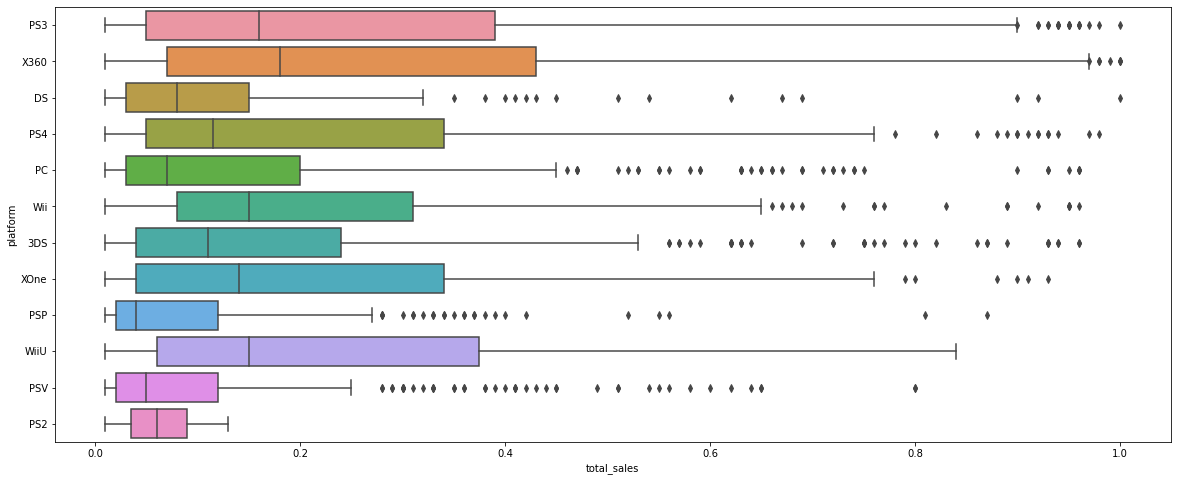

In [38]:
plt.subplots(figsize=(20,8))
sns.boxplot(data=games_extract.loc[games_extract['total_sales']<=1.0], x="total_sales", y='platform');
plt.show()

Медиана глобальных продаж составляет 0.13 млн.

Если смотреть в разрезе платформ, то:
 - медиана продаж выше всего у платформ: X360, PS3 (порядка 0,2 млн.) и с наибольшим интерквантильным размахом. Видимо, это вызвано тем, что платформы достаточно старые, за время из существования было выпущено много разных игр;
 - ниже - у PSP, PSV, что видимо вызвано портативным форматом игровых платформ и небольшим ассортиментом игр.

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.

*Выберем для анализа платформу PS3, которая давно на рынке и является предшественником текущего лидера по продажам PS4.*

In [39]:
# Выборка данных для платформы PS3, с заполненными значениями critic_score и user_score
extract = games_extract.loc[
    (games_extract['platform']=='PS3') & (games_extract['critic_score'] > 0) & (games_extract['user_score'] > 0) 
]

''

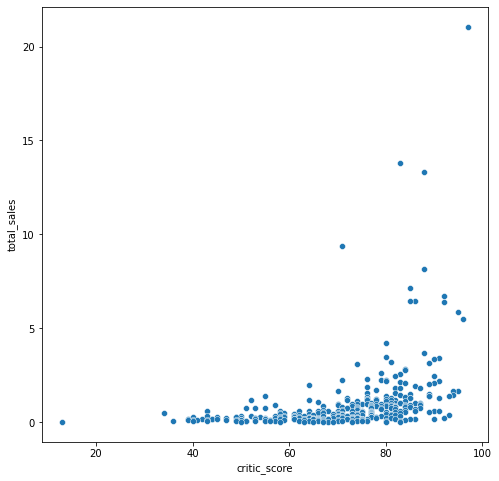

In [40]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="critic_score", y="total_sales", data=extract)
''

''

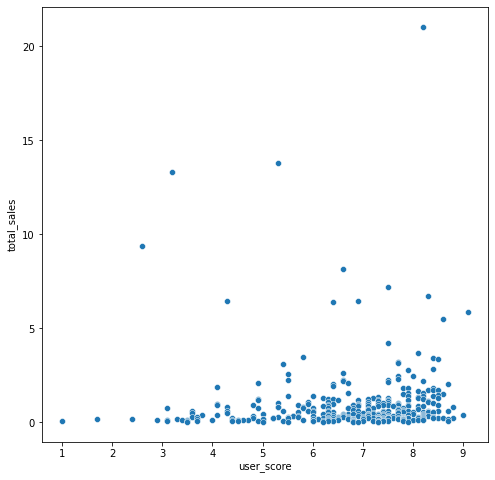

In [41]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="user_score", y="total_sales", data=extract)
''

''

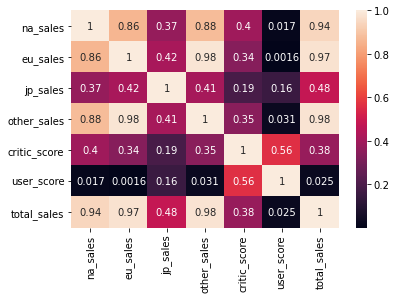

In [42]:
sns.heatmap(extract.drop(columns='year_of_release').corr(), annot=True)
''

In [43]:
platforms_ =  sorted(games.loc[games['year_of_release'] ==2016,'platform'].unique().tolist())

extract = games_extract.loc[
    (games_extract['critic_score'] > 0) & (games_extract['user_score'] > 0) 
]

print('Корреляция продаж и оценки критиков в разрезе платформ: ')
for plat in platforms_:
    temp = extract[extract['platform'] == plat]
    print(
        plat,
        "Total sales: ", round(temp['total_sales'].corr(temp['critic_score']),2),
        "NA sales: ", round(temp['na_sales'].corr(temp['critic_score']),2),
        "EU sales: ", round(temp['eu_sales'].corr(temp['critic_score']),2),
        "JP sales: ", round(temp['jp_sales'].corr(temp['critic_score']),2),
    )
print('')    
print('Корреляция продаж и оценки пользователей в разрезе платформ: ')
for plat in platforms_:
    temp = extract[extract['platform'] == plat]
    print(
        plat,
        "Total sales: ", round(temp['total_sales'].corr(temp['user_score']),2),
        "NA sales: ", round(temp['na_sales'].corr(temp['user_score']),2),
        "EU sales: ", round(temp['eu_sales'].corr(temp['user_score']),2),
        "JP sales: ", round(temp['jp_sales'].corr(temp['user_score']),2),
    )

Корреляция продаж и оценки критиков в разрезе платформ: 
3DS Total sales:  0.34 NA sales:  0.33 EU sales:  0.3 JP sales:  0.34
PC Total sales:  0.31 NA sales:  0.27 EU sales:  0.32 JP sales:  nan
PS3 Total sales:  0.38 NA sales:  0.4 EU sales:  0.34 JP sales:  0.19
PS4 Total sales:  0.41 NA sales:  0.41 EU sales:  0.35 JP sales:  0.32
PSV Total sales:  0.13 NA sales:  -0.01 EU sales:  0.13 JP sales:  0.24
Wii Total sales:  0.25 NA sales:  0.24 EU sales:  0.24 JP sales:  0.15
WiiU Total sales:  0.35 NA sales:  0.35 EU sales:  0.38 JP sales:  0.27
X360 Total sales:  0.39 NA sales:  0.37 EU sales:  0.38 JP sales:  0.33
XOne Total sales:  0.41 NA sales:  0.38 EU sales:  0.37 JP sales:  0.2

Корреляция продаж и оценки пользователей в разрезе платформ: 
3DS Total sales:  0.23 NA sales:  0.21 EU sales:  0.18 JP sales:  0.28
PC Total sales:  -0.06 NA sales:  -0.08 EU sales:  -0.05 JP sales:  nan
PS3 Total sales:  0.03 NA sales:  0.02 EU sales:  0.0 JP sales:  0.16
PS4 Total sales:  -0.03 NA sa

- Оценка критиков влияет на продажи в регионах NA, EU, other. Видимо, сильно влияние экспертов, кроме того, эксперты могут давать действительно давать объективные оценки играм, которые являются индикатором успешности той или иной игры.
- Оценка критиков не влияет на продажи в Японии, возможно, это вызвано различиями между западной и японской культур.
- Линейная зависимость между оценкой пользователей и продажами не подтвердилась. Видимо, оценки пользователей ситуативны, зависят от настроения, а расстройство пользователей может быть вызвано тем, что для выпуска той или иной игры была выбрана не их, например, любимая консоль.

<a id='Sec03-04'></a>
### Пристальный взгляд на жанры

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:xlabel='genre', ylabel='count'>

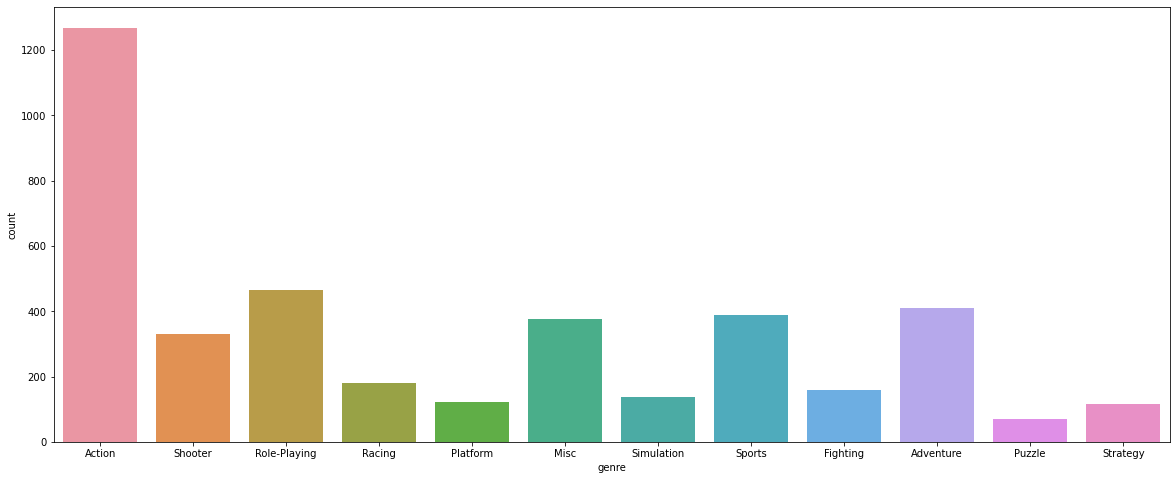

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(x=games_extract['genre'])

In [45]:
games_extract.groupby(['genre'])['total_sales'].sum().sort_values(
    ascending=False)

genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: total_sales, dtype: float64

In [46]:
top_genres = games_extract.groupby(['genre'])['total_sales'].sum().sort_values(
    ascending=False).head(6).index.to_list()
top_genres

['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc', 'Platform']

*Жанры с наибольшими суммарными продажами: 'Action', 'Shooter', 'Role-Playing', 'Sports'*

*Жанр Puzzle имеет наименьшие продажи.*

''

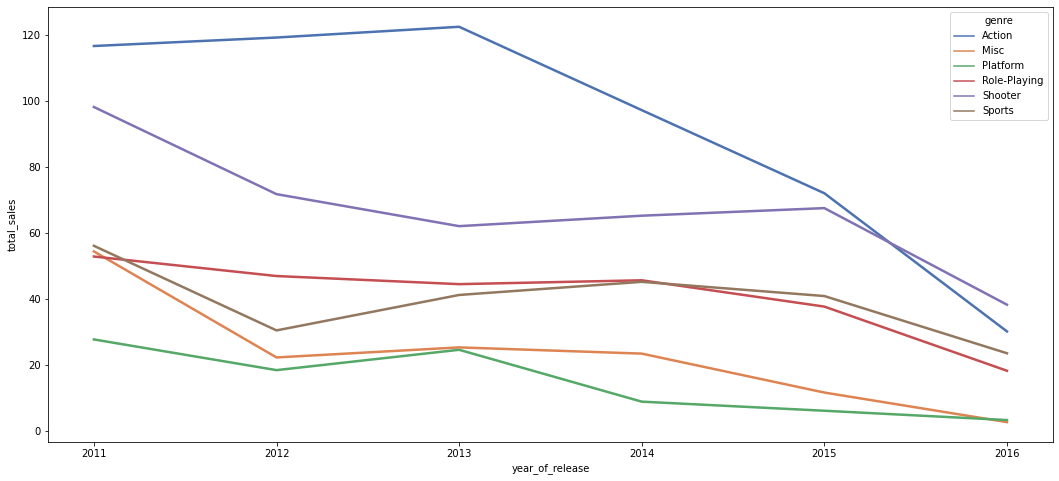

In [47]:
extract = games_extract[(games_extract['genre'].isin(top_genres)) ]
extract = pd.DataFrame(extract.groupby(['year_of_release', 'genre'])['total_sales'].sum().reset_index())
plt.figure(figsize=(18,8))
sns.lineplot(data=extract, y='total_sales' , x='year_of_release', hue='genre', palette="deep", linewidth=2.5)
''

*Игры развлекательного характера всегда были в топ, видимо нужно где-то адреналин получать. Игры, которые требуют ментальной энергии находятся к хваосте рейтинга.*

<a id='Sec04'></a>
## Портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Поясните разницу.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [48]:
# фунция для графиков
def regions_plot(data, feature, region_sales, ax):
    pivot = data.groupby(feature).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'EU Sales', 'jp_sales': 'Japan Sales'}
    plot = pivot.plot(kind='bar', title=title_dict[region_sales], ax=axes[ax], fontsize=18, legend=None)
    plot.set_xlabel('')
    plot.title.set_size(20)

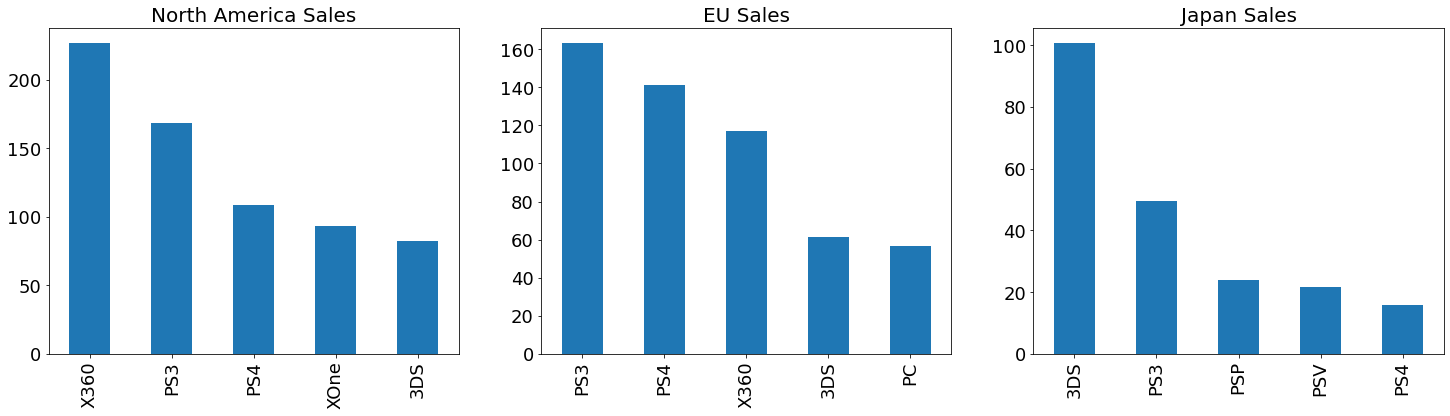

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
regions_plot(games_extract,'platform', 'na_sales', 0)
regions_plot(games_extract,'platform', 'eu_sales', 1)
regions_plot(games_extract,'platform', 'jp_sales', 2)

Топ-3 платформ для Северной Америки и Европы одни и те же: X360, PS3, PS4. В Японии, что ожидаемо, популярны совсем другие платформы, японских компаний

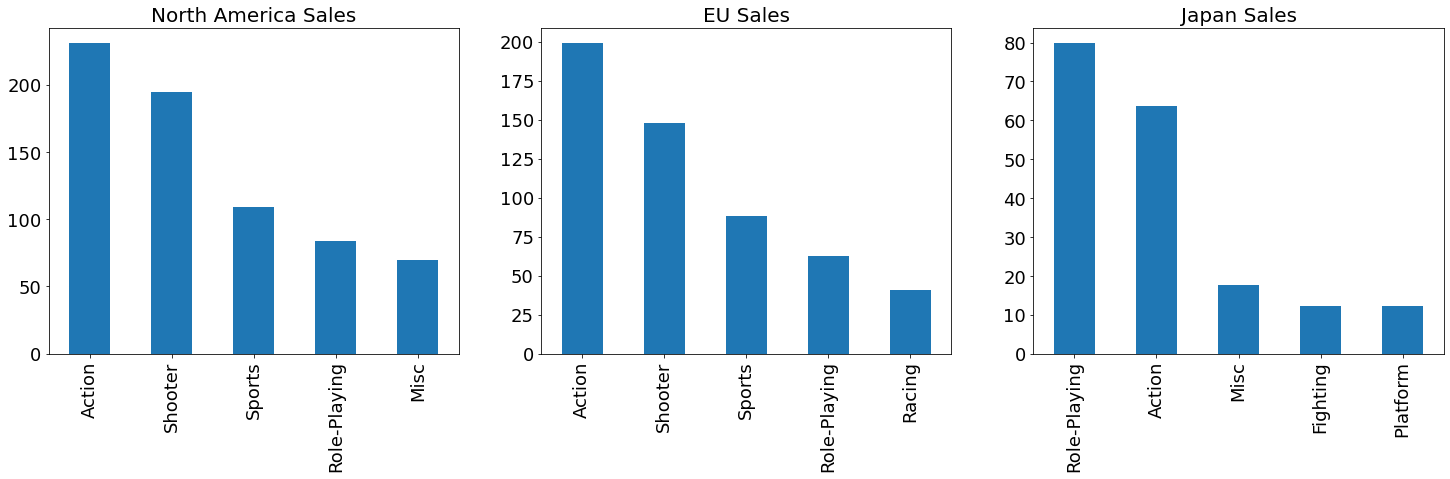

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
regions_plot(games_extract,'genre', 'na_sales', 0)
regions_plot(games_extract,'genre', 'eu_sales', 1)
regions_plot(games_extract,'genre', 'jp_sales', 2)

Жанровые предпочтения Северной Америки и Европы схожи, как и с платформами: предпочитают экшен, спортивные игры и шутеров.
В Японии предпочитают ролевые игры, а затем экшен и спортивные игры.

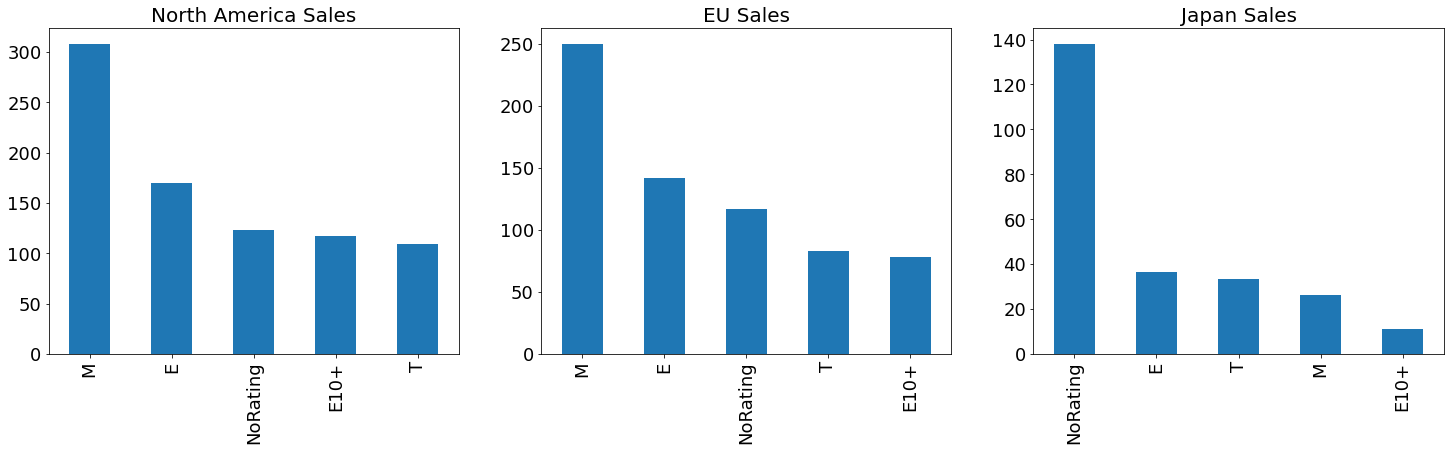

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
regions_plot(games_extract,'rating', 'na_sales', 0)
regions_plot(games_extract,'rating', 'eu_sales', 1)
regions_plot(games_extract,'rating', 'jp_sales', 2)

В топ-3 рейтингов по продажам вошли рейтинги: для всех (Е), для взрослых (М) и без рейтинга. В Японии вместо игр для взрослых популярны игры для тинейджеров.

<a id='Sec05'></a>
## Жанры и рейтинги
Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения

<a id='Sec05-01'></a>
### Жанры глазами пользователей

In [52]:
# список жанров
genres = games_extract['genre'].unique().tolist()
# len(genres) # 12

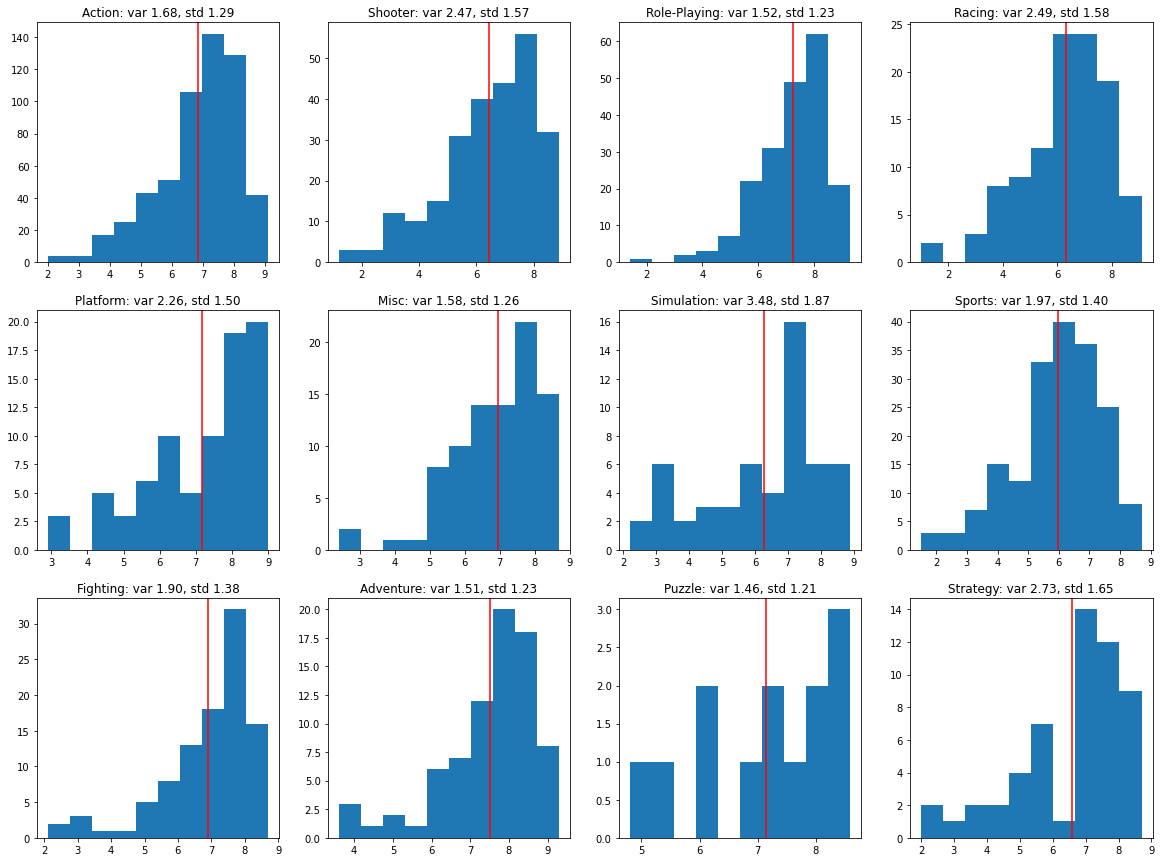

In [53]:
# график - распределение оценок пользователей по жанрам
plt.figure(figsize=(20,15))
row = 3  # rows
col = 4  # cols
i =1  # plot num

for genre in genres: 
    df_user_score = games_extract[
        (games_extract['genre'] == genre) & (games_extract['critic_score'] > 0) & (games_extract['user_score'] > 0)
    ]['user_score']
    mean = df_user_score.mean() 
    var = df_user_score.var()
    std = df_user_score.std()
    ax = plt.subplot(3, 4, i)
    plt.title('{}: var {:.2f}, std {:.2f}'.format(genre, var, std))
    plt.hist(x=df_user_score)
    ax.axvline(mean, color='r')
    i += 1

*Распределение оценок пользователей по жанрам скошено к более высоким оценкам, что немного удивляет, т.к. обычно люди больше ругают, чем хвалят.*

<a id='Sec05-02'></a>
### Жанры глазами критиков

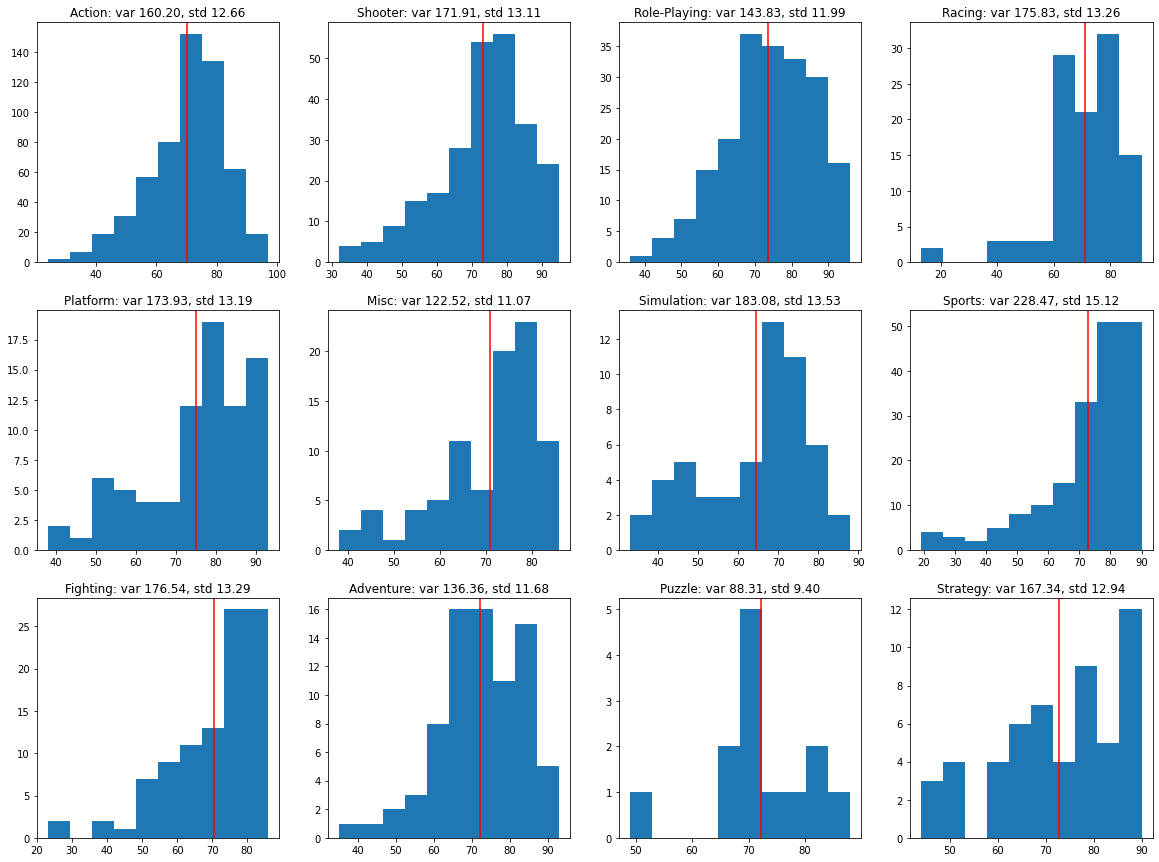

In [54]:
# график - распределение оценок критиков по жанрам
plt.figure(figsize=(20,15))
row = 3  # rows
col = 4  # cols
i =1  # plot num

for genre in genres: 
    df_critic_score = games_extract[
        (games_extract['genre'] == genre) & (games_extract['critic_score'] > 0) & (games_extract['user_score'] > 0)
    ]['critic_score']
    mean = df_critic_score.mean() 
    var = df_critic_score.var()
    std = df_critic_score.std()
    ax = plt.subplot(3, 4, i)
    plt.title('{}: var {:.2f}, std {:.2f}'.format(genre, var, std))
    plt.hist(x=df_critic_score)
    ax.axvline(mean, color='r')
    i += 1

*Распределение оценок критиков по жанрам скошено к средним и более высоким оценкам, возможно это вызвано "джентельменским" соглашением - не критиковать слишком строго, иначе сами эксперты могут оказаться не у дел. 

<a id='Sec06'></a>
## Проверка гипотез

Выдвенем гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

<a id='Sec06-01'></a>
### Средние пользовательские рейтинги платформ Xbox One и PC

**Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [55]:
alpha = 0.05

xbox_one = games_extract[
    (games_extract['platform'] == 'XOne') & (games_extract['critic_score'] > 0) & (games_extract['user_score'] > 0)
]['user_score']
pc = games_extract[
    (games_extract['platform'] == 'PC') & (games_extract['critic_score'] > 0) & (games_extract['user_score'] > 0)
]['user_score']
results = st.ttest_ind(xbox_one, pc)

print(f'p-value {results.pvalue:.5f}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value 0.64978
Не получилось отвергнуть нулевую гипотезу


<a id='Sec06-02'></a>
### Средние пользовательские рейтинги жанров Action и Sports

**Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные.**

- H0: Средние пользовательские рейтинги платформ жанров Action и Sports не различаются;
- H1: Средние пользовательские рейтинги платформ жанров Action и Sports различаются.

In [56]:
alpha = 0.05

action = games_extract[
    (games_extract['genre'] == 'Action') & (games_extract['critic_score'] > 0) & (games_extract['user_score'] > 0)
]['user_score']
sports = games_extract[
    (games_extract['genre'] == 'Sports') & (games_extract['critic_score'] > 0) & (games_extract['user_score'] > 0)
]['user_score']
results = st.ttest_ind(action, sports)

print(f'p-value {results.pvalue:.5f}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value 0.00000
Отвергаем нулевую гипотезу


<a id='sec07'></a>
## Вывод

Dislaimer: Анализ рынка игр проведен по данным за 37 лет.
1. В последнее время мобильные устройства упали в цене и стали доступнее. Это привело к тому, что рынок игр падает. В связи с этим, возможно, стоит пересмотреть бизнес модель магазина "Стримчик", учитывая, что у мобильных платформ есть свои "рынки" приложений.

2. Рынок игр с точки зрения платформ достаточно динамичен и высококонкурентен. В среднем платформы живут 8-12 лет. В связи с этим при формировании ассортимента игр важно учитывать жизненный цикл платформ, для которых они были выпущены.

3. В 2016 году в топ-3 платформ вошли - PS4; XOne; 3DS.

4. Дальнейшие выводы были сделаны на основе анализа продаж игр, выпущенных в 2011 году и позднее:
    - Исторически наиболее привлекательные продажи генерировали игры, выпущенные под  X360, PS3. Возможно, последующие версии платформ этих же производителей XOne и PS4 повторят историю предшественников;
    - Одним из ключевых факторов, влияющим на продажи игр, является оценка критиков. Необходимо отслеживать игры с высокими рейтингами критиков. Ориентироваться на рейтинги пользователей при формировании ассортимента не стоит в силу меньшей объективности;
    - В Европе и Америка популярны платформы X360, PS3, PS4. В Японии популярны совсем другие платформы - японских компаний. Поэтому при формировании ассортимента необходимо опираться на локальные особенности рынка;
    - Наиболее популярны игры, которые способствуют выработке адреналина. Более умственные игры замыкают рейтинг;
    - Жанровые предпочтения Северной Америки и Европы схожи, как и с платформами: предпочитают экшен, спортивные игры и шутеров. В Японии предпочитают ролевые игры, а затем экшен и спортивные игры.
    - В регионах EU и NA наиболее популярны игр для взрослых, то есть основная целевая аудитория - взрослые. 
    - В Японии популярны игры без рейтинга, видимо, производители игр под японские платформы не считают нужным отправлять игры на выставление рейтинга, что косвенно может судить о таргетировании на локальный рынок.

P.S. Привет из 2021 года - дождитесь пандемии 2020-2021 гг., когда все вернутся в квартиры! :)